In [169]:
import requests
import torch 
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms
import random
from PIL import Image
import io
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from math import sqrt
import numpy as np

In [322]:
url = "https://picsum.photos/id/237/200/300" 
response = requests.get(url)
original = transforms.ToTensor()(Image.open(io.BytesIO(response.content)))

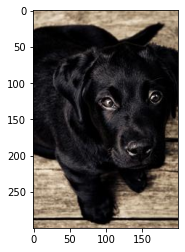

In [323]:
plt.imshow(original.permute(1, 2, 0))
plt.show()

In [451]:
class Noise(object):
    """Adds a small perturbation to the image colors"""
    def __init__(self, magnitude=0.05):
        self.magnitude = magnitude
    
    def __call__(self, image):
        distr = torch.distributions.uniform.Uniform(1-self.magnitude, 1+self.magnitude)
        perturbation = distr.sample(image.shape)
        return torch.clamp(image * perturbation, min=0, max=1)

tot = transforms.Compose([
    Noise(0.25),
    #transforms.GaussianBlur((5, 5)),
    #transforms.Normalize(mean=0, std=1)
])
rand = transforms.Compose([
    transforms.RandomApply([transforms.RandomCrop(size=(128, 128))], p=0.5),
    transforms.RandomApply([Noise(0.25)], p=0.5),
    transforms.RandomApply([transforms.GaussianBlur((5, 5))], p=0.5)
])

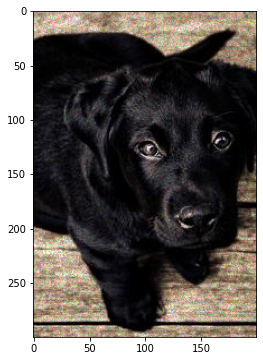

In [454]:
perturbed = tot(original)

plt.figure(figsize = (4,6))
plt.imshow(perturbed.permute(1, 2, 0), aspect='auto')
plt.show()

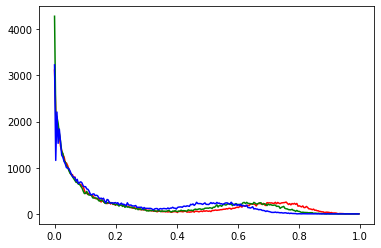

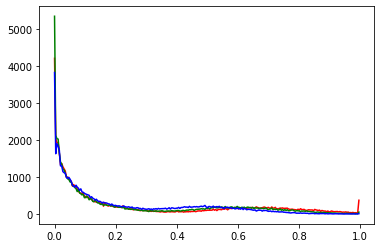

In [448]:
colors = ["r", "g", "b"]
for i in range(0, 3):
    histogram, bin_edges = np.histogram(original[i], bins=256, range=(0, 1))
    plt.plot(bin_edges[0:-1], histogram, colors[i])
plt.show()

for i in range(0, 3):
    histogram, bin_edges = np.histogram(perturbed[i], bins=256, range=(0, 1))
    plt.plot(bin_edges[0:-1], histogram, colors[i])
plt.show()

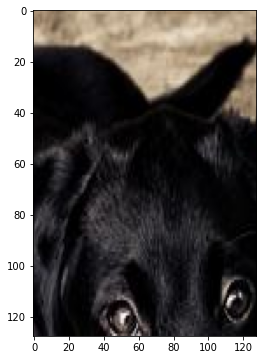

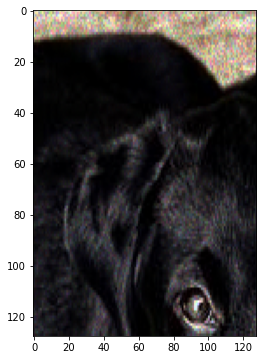

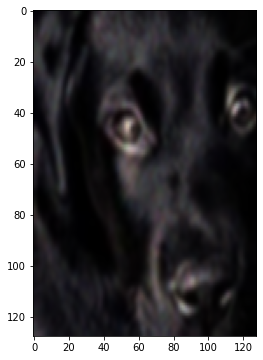

In [453]:
for i in range(0, 3):
    perturbed = rand(original)
    plt.figure(figsize = (4,6))
    plt.imshow(perturbed.permute(1, 2, 0), aspect='auto')
    plt.show()